In [3]:
import os
import tarfile
from urllib import request
import pandas as pd
from pandas import DataFrame,Series
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): # 检查当前文件夹是否存在，如果不存在，创建一个文件夹
           os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") # 连接两个地址，电脑文件地址
    request.urlretrieve(housing_url, tgz_path)     # 打开第一个链接下载到第二个电脑位置
    housing_tgz = tarfile.open(tgz_path)           # 打开文件
    housing_tgz.extractall(path=housing_path)     #  解压文件
    housing_tgz.close()              
    return pd.read_csv(os.path.join(housing_path,'housing.csv'))
# 获取数据
datasets1=pd.read_csv('datasets/housing/housing.csv')

In [2]:
datasets1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


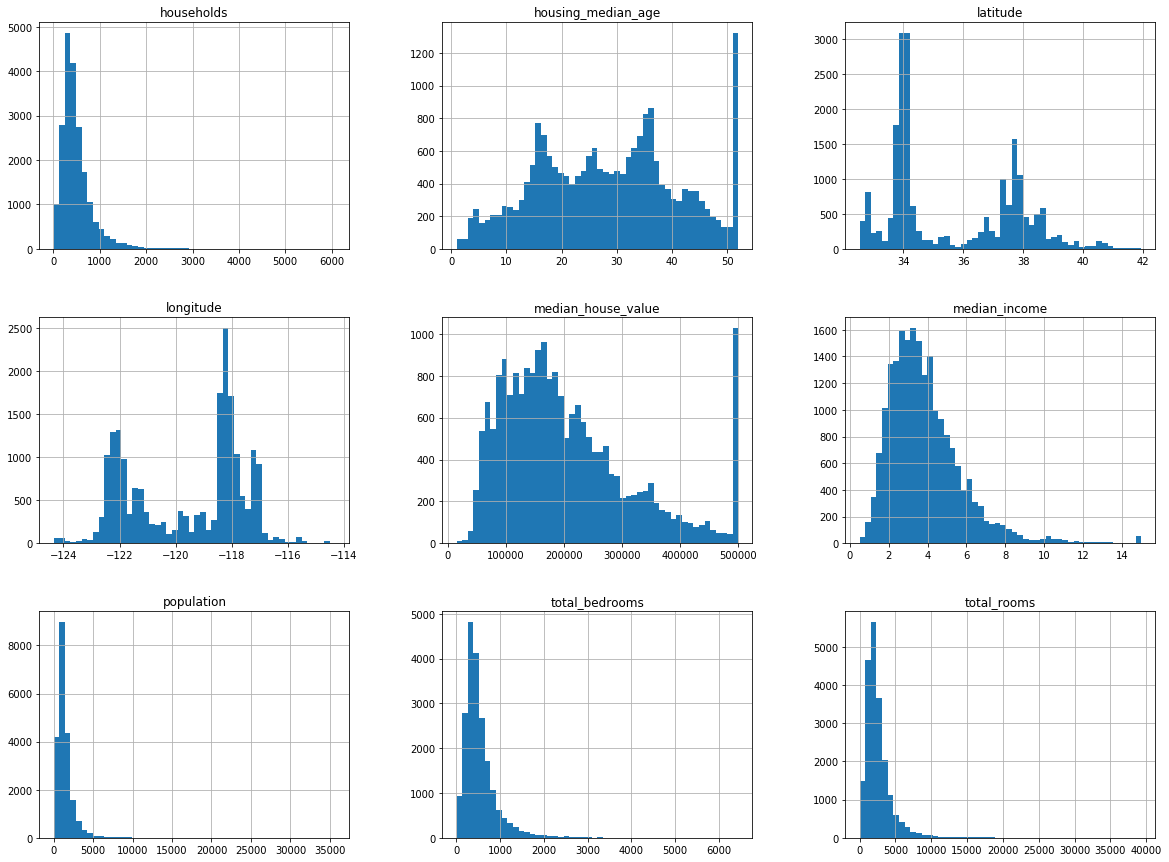

In [4]:
import matplotlib.pyplot as plt
datasets1.hist(bins=50,figsize=(20,15)) # bins 输入数字表示将x轴分成20份或者50份
plt.show()

In [5]:
# 划分测试集与训练集
# 书上的方法
import numpy as np
def split_train_test(data, test_ratio):
   shuffled_indices = np.random.permutation(len(data)) #  混淆，将这些随机数随机打乱
   test_set_size = int(len(data) * test_ratio)
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   return data.iloc[train_indices], data.iloc[test_indices]
# 我自己的方法
drownum=datasets1.shape[0]
np.random.seed(10)
test_index=np.random.choice(drownum,size=round(drownum*0.2))
train_index=np.setdiff1d(range(drownum),test_index)

In [6]:
# 但是某些时候，当系统的数据发生了更新，而你希望原来的训练集和测试集不要变，新加入的就分别加到测试集和训练集之中
import hashlib
def hash_get(identifical,ratio,hash):
    return hash(np.int64(identifical)).digest()[-1]<256*ratio  # 这个是用于hash标注
def split_train_test_id(data,index,ratio,hash=hashlib.md5):
    dataid=data[index]
    intestset=dataid.apply(lambda id_:hash_get(id_,ratio,hash))
    return data.loc[~intestset],data.loc[intestset]  #  这段代码不一定对，但是这个想法可以get

In [7]:
# 除此之外还有种划分方法
from sklearn.model_selection import train_test_split
[trainset,testset]=train_test_split(datasets1,test_size=0.2,random_state=10)

In [8]:
datasets1['median_income'].hist(bins=200)
datasets1['category']=np.ceil(datasets1['median_income']/1.5)
datasets1['category'].where(datasets1['category']<5,5.0,inplace=True) # 这个的意思是将收入划分为几个类别,在1.5以下的ceil之后变为1，1.5到3ceil为2，依次类推
datasets1['category'].value_counts(normalize=True)  # 然后我们就可以根据这个来进行分层抽样

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: category, dtype: float64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split_strat=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=10)
for trainindex,testindex in split_strat.split(datasets1,datasets1['category']): # 这里暂时只是发现了这种利用for来进行取值的方法，当n_splits=n时，他会随机划分n次，就会有n组值  
    train_set=datasets1.iloc[trainindex]
    test_set=datasets1.iloc[testindex]
# 比较下是否是按比例来进行划分的
train_set.category.value_counts(normalize=True)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: category, dtype: float64

In [10]:
test_set.category.value_counts(normalize=True)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: category, dtype: float64

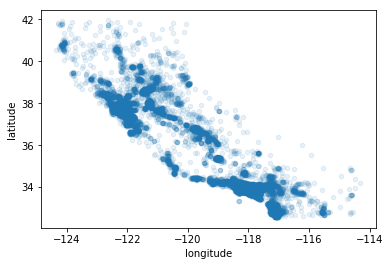

In [12]:
# 开始玩数据之前，最好把训练集做一个备份--画出选区的经纬度
train_set_copy=train_set.copy()
train_set_copy.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)
plt.show()

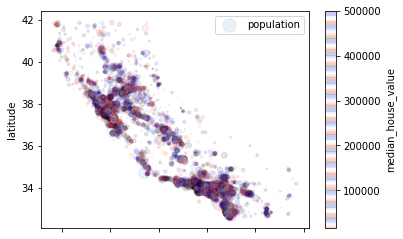

In [31]:
train_set_copy.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,s=train_set_copy['population']/100,label='population',c='median_house_value',
                   cmap=plt.get_cmap('flag'),colorbar=True) # kind 是选方法，这个就选了scatter方法,但是这样画起来不如上面那么舒服
plt.legend()
plt.show()

In [29]:
plt.scatter(x=train_set_copy['longitude'],y=train_set_copy['latitude'],alpha=0.1,s=train_set_copy['population']/100,
            label=train_set_copy['population'],c=train_set_copy['median_house_value'],cmap=plt.get_cmap(),colorbar=True)
plt.show()
plt.close()

AttributeError: Unknown property colorbar

In [14]:
train_set_copy.corr() # 计算皮尔逊相关系数

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,category
longitude,1.000000,-0.924811,-0.112242,0.041552,0.066160,0.095988,0.051258,-0.017597,-0.047029,-0.011614
latitude,-0.924811,1.000000,0.015972,-0.034738,-0.064800,-0.107604,-0.068877,-0.078003,-0.142767,-0.085051
housing_median_age,-0.112242,0.015972,1.000000,-0.362091,-0.322209,-0.294594,-0.303700,-0.121763,0.105207,-0.150293
total_rooms,0.041552,-0.034738,-0.362091,1.000000,0.931504,0.855410,0.918269,0.198694,0.133556,0.221299
total_bedrooms,0.066160,-0.064800,-0.322209,0.931504,1.000000,0.877322,0.978703,-0.007365,0.047816,0.016125
population,0.095988,-0.107604,-0.294594,0.855410,0.877322,1.000000,0.907837,0.004524,-0.025445,0.026593
households,0.051258,-0.068877,-0.303700,0.918269,0.978703,0.907837,1.000000,0.013556,0.064821,0.039393
median_income,-0.017597,-0.078003,-0.121763,0.198694,-0.007365,0.004524,0.013556,1.000000,0.688143,0.903203
median_house_value,-0.047029,-0.142767,0.105207,0.133556,0.047816,-0.025445,0.064821,0.688143,1.000000,0.642582
category,-0.011614,-0.085051,-0.150293,0.221299,0.016125,0.026593,0.039393,0.903203,0.642582,1.000000


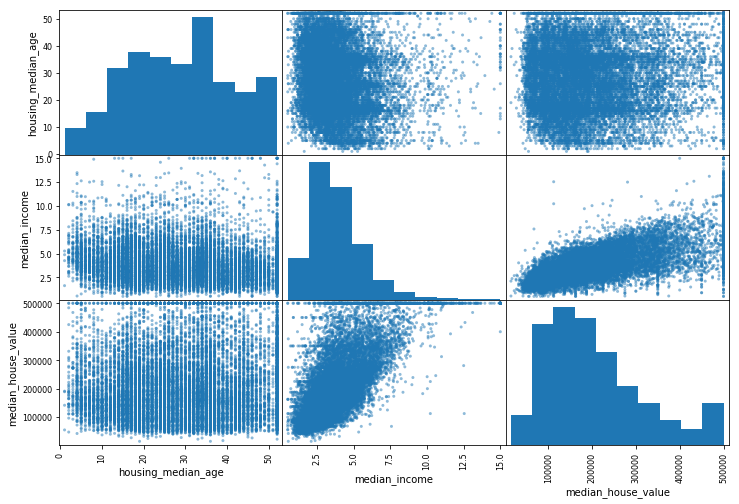

In [15]:
from pandas.plotting import scatter_matrix
attr=['housing_median_age','median_income','median_house_value']
scatter_matrix(train_set_copy[attr],figsize=(12,8))
plt.show()

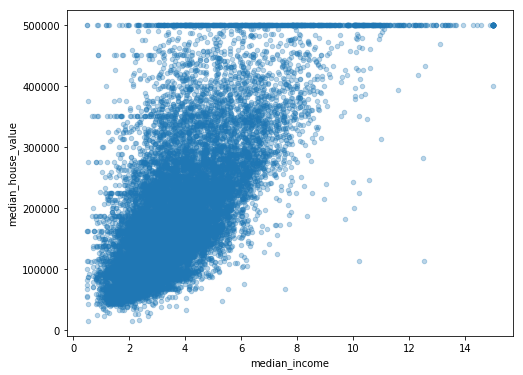

In [16]:
train_set_copy.plot(kind='scatter',x='median_income',y='median_house_value',figsize=(8,6),alpha=0.3) # alpha 用于设置显著性，越是显著的越亮
plt.show()

In [17]:
# 考虑数据的合并，比如某些这个项目里面的房间数量，对我们而言，我们并不关心，反而我们关心的是，每个householder拥有的房间数量
train_set_copy.head()
train_set_copy['rooms_per_household']=train_set_copy['total_rooms']/train_set_copy['households']
train_set_copy['bedrooms_per_household']=train_set_copy['total_bedrooms']/train_set_copy['households']
train_set_copy['population_per_household']=train_set_copy['population']/train_set_copy['households']
train_set_copy.head()
corr_matrix=train_set_copy.corr()
corr_matrix['bedrooms_per_household'].sort_values(ascending=False)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688143
category                    0.642582
rooms_per_household         0.150736
total_rooms                 0.133556
housing_median_age          0.105207
households                  0.064821
total_bedrooms              0.047816
population                 -0.025445
population_per_household   -0.033157
longitude                  -0.047029
bedrooms_per_household     -0.057281
latitude                   -0.142767
Name: median_house_value, dtype: float64

In [18]:
# 开始训练我们的模型
# 划分labels 和非 labels
train_labels=train_set_copy['median_house_value'].copy()
train_exlabels=train_set_copy.drop('median_house_value',axis=1)
# 数据清洗
train_exlabels.notnull().sum(axis=0) # 可以发现，数据种存在一些null,如何进行清理
# sklearn 中有一个能够处理缺失值的包--不能处理字符型
train_exlabels.drop('ocean_proximity',axis=1,inplace=True)
# 开始处理缺失值
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median",axis=0)
imputer.fit(train_exlabels)  # 用什么数据的内容来填补下面transform的数据空缺，这里用它自己的数据来填充，当然也可以用其他数据来,---但是这个会清除dataframe的格式
imputer.statistics_  # 显示按strategy统计的值
notnull_train=imputer.transform(train_exlabels)
notnulltrain=DataFrame(notnull_train,columns=train_exlabels.columns)
# 其他处理方法
train_exlabels.notnull().sum(axis=0)
totalbedroommed=train_exlabels.median(axis=0)['total_bedrooms']
perbedroonmed=train_exlabels.median(axis=0)['bedrooms_per_household']
train_exlabels.total_bedrooms.fillna(totalbedroommed,inplace=True)
train_exlabels.bedrooms_per_household.fillna(perbedroonmed,inplace=True)

In [19]:
# 将去除的字符向量进行处理
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
ocean_proxi=train_set_copy['ocean_proximity'] # 利用这种方法进行coding，他不会对两个向量之间的关系进行比较，默认相距越近的量相似度越高，值就越相近
# 但是在本例子种，1和4的距离就比1和2好，所以有另外一种处理字符向量的方法--onehotencoder
ocean_proxi_encode=encoder.fit_transform(ocean_proxi)
encoder.classes_
# OneHotEncoder---是要在LabelEncoder的基础上进行
from sklearn.preprocessing import OneHotEncoder
encoder2=OneHotEncoder()
ocean_proxi_encoded_Oh=encoder2.fit_transform(ocean_proxi_encode.reshape(-1,1))
ocean_proxi_encoded_Oh # 这是一个scipy类型的数据，因为OneHotEncoder出来的数据太多0了，与其浪费空间去存储0，还不如就记录下1的位置就行了，这个的用法和二维的ndarry相
ocean_proxi_encoded_Oh.toarray() # 这个是将他变为ndarry的方法
# 上面两种方法可以直接被一种方法链接起来使用
from sklearn.preprocessing import LabelBinarizer
encoder3=LabelBinarizer()
ocean_proxi_encoded_3=encoder3.fit_transform(ocean_proxi)
ocean_proxi_encoded_3
encoder3.classes_
data2=DataFrame(ocean_proxi_encoded_3,columns=encoder3.classes_)

In [20]:
# 数据的scaling min-max scaling/standardization
# min-max scaling ---也叫normalization，归一化，正态化，这个容易受离群值的影响，比如一个极大的离群值就可能导致出错
# standardization ---把mean取值为0，其余的等价为方差分布，
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
train2=stdscaler.fit_transform(train_exlabels)
data1=DataFrame(train2,columns=train_exlabels.columns)
final_train=data1.join(data2)
final_train.drop('category',axis=1,inplace=True)


In [21]:
# 开始训练模型
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(final_train,train_labels)
from sklearn.metrics import mean_squared_error
predictions=linear.predict(final_train)
squre_error=mean_squared_error(predictions,train_labels)
sqrterr=np.sqrt(squre_error)
sqrterr # 这个出来的差比较大，所以考虑更换一个 model

68480.217807435765

In [207]:
# 决策树回归
from sklearn.tree import DecisionTreeRegressor
decisiontree=DecisionTreeRegressor()
decisiontree.fit(final_train,train_labels)
predictions=decisiontree.predict(final_train)
np.sqrt(mean_squared_error(predictions,train_labels))# 为0是明显有问题的，决策树不经过剪枝，一定会overfitting

0.0

In [208]:
# cross-validation,交叉验证
from sklearn.model_selection import cross_val_score
decisiontreescores=cross_val_score(decisiontree,final_train,train_labels,cv=10,scoring='neg_mean_squared_error') # 这里取负的原因是，greater is better,高的更好，所以取为负值，这样就将greater is better 转换为lower is better
value=np.sqrt(-decisiontreescores)
print(value)
print(value.mean())
print(value.std())  # 实际上决策树overfitting 过于严重了，导致实际效果远不如regression

[ 69610.86079479  69101.91228379  70379.75995318  67052.16088432
  71260.74636705  71749.01527389  72644.64388602  68303.83569558
  71463.06993169  72587.98947675]
70415.3994547
1772.69034211


In [209]:
# 验证下regression的交叉验证结果
regressionscores=cross_val_score(linear,final_train,train_labels,cv=10,scoring='neg_mean_squared_error')
value=np.sqrt(-regressionscores)
print(value)
print(value.mean())
print(value.std())

[ 70683.29672473  73070.84538431  69301.34356312  69318.21239778
  65772.95885096  66568.70407659  68768.65703655  69730.08975868
  66710.67587901  68488.05999233]
68841.2843664
2043.52790844


In [218]:
# 随机森林算法--
from sklearn.ensemble import RandomForestRegressor
rfregressor=RandomForestRegressor()
rfscore=cross_val_score(rfregressor,final_train,train_labels,cv=10,scoring='neg_mean_squared_error')

In [211]:
value=np.sqrt(-rfscore)
print(value)
print(value.mean())
print(value.std()) # --结果要稍微好一点了

[ 53038.75336673  51740.39305686  54706.84500252  53047.69998601
  50527.62141722  52612.95975269  53898.91912301  52958.21545974
  52708.0319997   54016.43317043]
52925.5872335
1124.23188347


In [212]:
# 超参数的选择方法---1.网格搜索，2.随机搜索，3.
# 网格搜索更好的参数
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(final_train, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [213]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

65538.6729012 {'max_features': 2, 'n_estimators': 3}
55389.1680172 {'max_features': 2, 'n_estimators': 10}
52927.214787 {'max_features': 2, 'n_estimators': 30}
61240.6114522 {'max_features': 4, 'n_estimators': 3}
52881.6535387 {'max_features': 4, 'n_estimators': 10}
50078.8478051 {'max_features': 4, 'n_estimators': 30}
58416.8572594 {'max_features': 6, 'n_estimators': 3}
52248.4423913 {'max_features': 6, 'n_estimators': 10}
49779.8871402 {'max_features': 6, 'n_estimators': 30}
58561.6442431 {'max_features': 8, 'n_estimators': 3}
52111.3893991 {'max_features': 8, 'n_estimators': 10}
49838.0358473 {'max_features': 8, 'n_estimators': 30}
62323.1239116 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54303.7303805 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61605.2867658 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52264.2736084 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59173.9510008 {'bootstrap': False, 'max_features': 4, 'n_estima

In [214]:
importance=grid_search.best_estimator_.feature_importances_ # 查看特征的重要性
final_train.columns.values
a=DataFrame({'importance':importance,'featurename':final_train.columns.values})
a.sort_values(by='importance',ascending=False)   # 看到了特征的重要性可以考虑删除一些特征，然后在进行训练

,featurename,importance
7,median_income,0.334600
12,INLAND,0.150735
10,population_per_household,0.104596
8,rooms_per_household,0.085397
1,latitude,0.085138
0,longitude,0.085083
2,housing_median_age,0.041426
9,bedrooms_per_household,0.023985
5,population,0.017954
3,total_rooms,0.017905


In [215]:
test_set_copy=test_set
test_set_copy['rooms_per_household']=test_set_copy['total_rooms']/test_set_copy['households']
test_set_copy['bedrooms_per_household']=test_set_copy['total_bedrooms']/test_set_copy['households']
test_set_copy['population_per_household']=test_set_copy['population']/test_set_copy['households']
test_labels=test_set_copy['median_house_value'].copy()
test_exlabels=test_set_copy.drop('median_house_value',axis=1)

c:\users\yzy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\yzy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\yzy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [216]:
# 处理测试集
test_copy1=test_exlabels.drop('ocean_proximity',axis=1)
test_process=newpipe.fit_transform(test_copy1)
test1=DataFrame(test_process,columns=test_copy1.columns)
test2=encoder3.fit_transform(test_copy.ocean_proximity)
test3=DataFrame(test2,columns=encoder3.classes_)
test_final=test1.join(test3)

In [220]:
# 看看测试结果---效果都不是特别好，其实。。。
print(np.sqrt(mean_squared_error(linear.predict(test_final),test_labels)))
print(np.sqrt(mean_squared_error(decisiontree.predict(test_final),test_labels)))
rfregressor.fit(final_train,train_labels)
print(np.sqrt(mean_squared_error(rfregressor.predict(test_final),test_labels)))

68318.9527985
75596.3970442
59132.5178066


In [320]:
# 这里有个sklearn的重要用法
# 前面我们处理数据时，需要进行很多步骤，那么可不可以将他一次性完成呢？sklearn 提供了一种有效的方法
# 我们梳理下，对数据进行预处理时，进行了什么工作
# 1.null,na的处理，是将他们覆盖上了median
# 2.对两个新的数据列的处理，新加入了两个特征，平均房间数量，平均卧室数量，平均人口数量
# 3.提取出ocean_proximary这个数据
# 4.对剩下的数据进行scale
# 5.对ocean_proximary 进行LabelBinarizer
# 6.合并两个数据集，成为一个完整的数据集
#1 自定义一个自己的类
# 这个类可以用于处理新加入的三个特征，这个重点在于利用了fit-transform这个函数，特别重要这个东西
roomix=3
householdix=6
populationix=5
bedroomix=4
from sklearn.base import BaseEstimator,TransformerMixin
class AttributeCombined(BaseEstimator,TransformerMixin):
    def fit(self,X):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,roomix]/X[:,householdix]
        population_per_household=X[:,populationix]/X[:,householdix]
        rooms_per_household=X[:,bedroomix]/X[:,householdix]
        return np.c_[X,rooms_per_household,population_per_household,rooms_per_household]
# 提取ocean_proximary这一列
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,columnsname):
        self.columnsname=columnsname
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.columnsname].values
# 重点来了
# sklearn中的一个大杀器！！
from sklearn.preprocessing import Imputer # 这个用于填补NA,NULL
from sklearn.preprocessing import StandardScaler # 这个用于标准化
from sklearn.preprocessing import LabelBinarizer # 这个用于处理0-1数据
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
class PipelineFriendlyLabelBinarizer(LabelBinarizer):
    def fit_transform(self, X, y=None):
        return super(PipelineFriendlyLabelBinarizer, self).fit_transform(X)
selectorcolumns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
fristpipe=Pipeline([
    ('selector1',DataFrameSelector(selectorcolumns)),
    ('imputer',Imputer(strategy='median')),
    ('attrbite',AttributeCombined()),
    ('std',StandardScaler()),])
secondpipe2= Pipeline([
('selector', DataFrameSelector('ocean_proximity')),
#('label_binarizer',LabelBinarizer()), # The LabelEncoder and LabelBinarizer classes were designed for preprocessing labels, 
 #not input features, so their fit() and fit_transform() methods only accept one parameter y instead of two parameters X and y
('labdesign',PipelineFriendlyLabelBinarizer())
]) # 教材出错
combinepipe=FeatureUnion(transformer_list=[('frist',fristpipe),('second',secondpipe2),])
trainsetcopy=train_set.copy()
combinepipe.fit_transform(trainsetcopy)

array([[ 1.15291322, -0.54213219, -1.8010244 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28354307,  1.13411308, -1.16612361, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85592012,  1.40959628, -0.61058542, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.69545612, -0.7569157 ,  0.57985356, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59103657, -0.74757729,  0.97666655, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57114713, -0.76625411,  0.10367797, ...,  0.        ,
         0.        ,  0.        ]])